# CSC 177  Twitter (USA 2016 Presidential Election Data Extraction)
# Dr. Haiquan Chen
### Team members: Ehsan Hosseinzadeh  Khaligh, Shah Newaz


#### Remove all retweets first. Remove all users that have less than 20 tweets. For the remaining users, use all available information in the tweets file that you consider useful to extract features for classification. You are also encouraged to use any conclusions you draw in project 1 (clustering) to create any features to improve the classification result.
- Load data file

In [1]:
import pandas as pd
import numpy as np
import sklearn.cluster as sk_cluster

pd.set_option('display.max_colwidth', -1)
column_names = ['Name', 'ScreenName', 'UserID', 'FollowersCount', 'FriendsCount', 'Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount', 'FavoriteCount', 'Text']

In [2]:
data_xaa = pd.read_table("data/clinton_trump_tweets.txt", header=None, names=column_names, encoding='ISO-8859-1', dtype='str')
data_xaa.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,null,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!
1,Cookie,Cookiemuffen,109945090,2154,2034,The American South,Got married after college. I don't regret starting a family instead of grad school. Proud Deplorable,Wed Oct 26 18:44:08 EEST 2016,791304413923213312,en,null,1937,0,RT @wikileaks: New poll puts Pirate Party on course to win Iceland's national elections on Saturday. https://t.co/edTqjeJaQ6
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,null,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.
3,Mark Hager,marksnark,167177185,204,448,Pittsburgh,"Hip, trendy, smart, funny, fit, lobbyist. U? Boilerplate: these thoughts are my own, not anyone else's. Hmmmkay?",Wed Oct 26 00:33:20 EEST 2016,791029904733331457,en,null,891,0,RT @LOLGOP: ACA needs fixes but know da facts: *70% can get covered in marketplaces for under $75/month *Hikes affect 3% *GOP will uninsu
4,Capitalist Creations,aaronjhoddinott,1191022351,775,154,Canada,"Entrepreneur, startup investor, political junkie, free market supporter, beer connoisseur, dad and dog lover. Also a golf enthusiast despite my lack of skill.",Fri Oct 28 05:05:10 EEST 2016,791823089700962304,en,null,7,0,RT @FastCompany: Alphabet shares soar on better-than-expected earnings as mobile video strategy pays off https://t.co/bokbXngMJt https://t.


In [699]:
data_xaa["RT"] = data_xaa["Text"].str.startswith("RT", na=False)
data_xaa["Hash Bool"] = data_xaa["Text"].str.contains("#") | data_xaa["Text"].str.contains("@")

dataCleaned = data_xaa[(~data_xaa["RT"]) & (data_xaa["Hash Bool"])]

dataCleaned.head()

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text,RT,Hash Bool
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Uncommon one 1-0 day at a time.,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,null,0,1,@NWAJimmy I've read it now though brother. Was pretty spot on Lots of bright spots but a lot to work on. Exactly as an exhibition should be!,False,True
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, trying to find a second act.",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,null,0,0,@gaystoner821 I think New Orleans spoiled me with food. I need to try and branch out in BR.,False,True
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bone. #HealthIT security matters. Opinions my own. https://t.co/Dcpe6FteOq,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,null,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell microarch. Paper proposes mitigations that could prevent BTB-based side https://t.co/DW6vgRAPrv,False,True
12,Alexandria Taylor,twentythreeofme,163712593,1342,1346,"Portland, Oregon",Activist | Creator | Educator | #FemTube Host | Passion Project: #DisabilitiesOnYT Panels | Want to participate? https://t.co/IYy6JVqmo5,Tue Oct 25 19:41:52 EEST 2016,790956555030061056,en,"PlaceJSONImpl{name='Washington', streetAddress='null', countryCode='US', id='bc3a38d3d5999b4b', country='United States', placeType='admin', url='https://api.twitter.com/1.1/geo/id/bc3a38d3d5999b4b.json', fullName='Washington, USA', boundingBoxType='Polygon', boundingBoxCoordinates=[[Ltwitter4j.GeoLocation;@5ad5215f], geometryType='null', geometryCoordinates=null, containedWithIn=[]}",0,7,"Well, I'm glad you got a good haircut, America's in the toilet. Is this not a conversation @Haylie_Bre and I woul https://t.co/6dVIIKZcgv",False,True
13,Harry Binford,CaptainNormal,2447279666,895,1224,USA,"Proud Christian husband, frequent shooting range attendee, and former law enforcement. Lifetime member of the NRA. Pro-life, Jesus is Lord. America first.",Thu Oct 27 21:44:44 EEST 2016,791712249685676032,en,null,0,0,@WayneDupreeShow #climatechange is the democrats' attempt to play God,False,True


In [700]:
dataCleaned.shape

(1531780, 16)

- keep users that have at least 20 tweets (either a hashtag or handle). 

- filter text column to keep only #. We have decided to do not keep handles in the data set. Because we don’t have enough information about the users to find out their political interest.  Without knowing their political interests we just have names which may make our model more complex and to overfit data. 

In [652]:
def filterHashtags(string):
    strList = []
    for i in string.split():
        if i.startswith("#"): 
            strList.append(i)
               
    if  len(strList) >= 20:
        return strList
    else:
        return "listSize<20"

In [653]:
dataCleaned["tweets"] = dataCleaned["Text"].apply(filterHashtags)
dataCleanedHashMoreThan20 = dataCleaned[dataCleaned.tweets != "listSize<20"]
dataCleanedHashMoreThan20.head()

/Users/Ehsan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Name       ScreenName      UserID FollowersCount  \
2232   Colleen Allen     Colleen_Allen14  1561696464  292             
6790   Tina Spargo       MaxwellsMom      16485488    102             
7537   James Gaffney     jamesgaffney     23535896    1280            
76205  Phillip Sheppard  PSheppardTV      22729901    81958           
85135  Liz A.            massfindings     23216446    152             

      FriendsCount                        Location  \
2232   1180         Seattle, Washington              
6790   122          Boston-ish                       
7537   2919         Limerick                         
76205  2672         WorldWide 80Million StealthRUs   
85135  260          NaN                              

                                                                                                                                                            Description  \
2232   School Psychologist  Social Justice  Feminism  Education  Books  Leadership  Soccer  Vegetarian/Vegan Cooking  Nature  German Shepherds                            
6790   NaN                                                                                                                                                                
7537   NaN                                                                                                                                                                
76205  The Specialist, Copyrighted TX0008044160 #SurvivorCBS #USArmy #Veteran #FormerFederalAgent #Author #Actor #LegendOfThingsPast All Rights Reserved #AManAboutTown   
85135  https://t.co/og5SVjTV7c                                                                                                                                            

                           CreatedAt            StatusID Language Place  \
2232   Sun Oct 30 23:53:14 EET 2016   792846850185236480  en       null   
6790   Sat Oct 29 21:12:57 EEST 2016  792429027512422400  en       null   
7537   Fri Oct 28 11:01:22 EEST 2016  791912731754557440  en       null   
76205  Sat Oct 29 08:48:48 EEST 2016  792241756339183616  en       null   
85135  Fri Oct 28 18:29:33 EEST 2016  792025517926907904  en       null   

      RetweetCount FavoriteCount  \
2232   0            1              
6790   0            0              
7537   2            2              
76205  13           6              
85135  0            0              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [654]:
filterColumnRequired = dataCleanedHashMoreThan20[['Name','UserID', 'tweets']]
filterColumnRequired.head()

,Name,UserID,tweets
2232,Colleen Allen,1561696464,"[#gunsense,, #humanrights, #LGBTQStraightally, #vegan, #addict, #UniteBlue, #MAGA!, #SaveAgentCarter, #I'mWithHer, #wednesday, #DNCleak, #BernieMustDisavow, #VoteBLUE, #p2, #Utah, #Trumps, #McMullin, #NeverTrump, #BreakingNews, #ROOKIEBLUE, #MCSWAREK, #BenBass, #ChicagoFire, #Dawsey, #ChicagoPD, #Linstead, #GH, #Lante, #TML, #Thurs]"
6790,Tina Spargo,16485488,"[#NCSU, #DIY, #foreclosuretohome, #WeAreNotThis, #Halloween, #DreamCreateInspire, #recipe, #ImWithHer, #NeverHitlerTrump, #ProSaneDemocrats, #imwithher, #estoyconella, #BernieSanders, #RIPVine, #ewpopfest, #ghostbusters, #protectTXfragilekids, #I'mWithHer, #NeverTrump, #Hearties, #WCTH, #ChesapeakeShores., #Hearties, #Chessies, #HallmarkSuperfans!, #Fitstats_en_US, #MUFC, #NoHillary, #Military, #Vets, #ProIsrael, #Benghazi, #TCOT, #CCOT, #MolonLabe,, #LESM, #MAGA, #AmericaFirst, #mobile, #wearables, #iot, #fintech, #startups, #blockchai, #SFGiants, #TCMParty., #RiffTrax., #SheShouldCutHisHeadOffAndBoilHimInOil, #TCMParty, #VaderGold, #MelloGang, #TKPuppytrooper]"
7537,James Gaffney,23535896,"[#LakeShow, #NationalChocolateDay, #ClashOfTheCorps, #bdworld, #lookslikeabadDude, #standingrock, #LTG, #MAGA, #2A, #Trump, #TrumpPence2016, #NeverHillary, #DrainTheSwamp, #DrainTheSwamp, #MAGA:, #AbolishIRS., #chilicheeseburrito, #JustDoIt, #NoDAPL, #INDIGENOUS, #TAIRP, #TrumpPence, #MAGA, #defendWL, #autismspectrum, #English, #French, #German, #Russian, #Trumpified, #trumptrain, #Analytics,, #Bigdata, #Cognitive, #data, #database., #cloud, #Kroff, #, #EmpowermentHour, #Tedx, #EthnicReplacement, #Election2016, #CanineRockBands]"
76205,Phillip Sheppard,22729901,"[#Yuengling, #AltRight, #Trump, #MAGA, #ImWithHer, #YAN, #Tapoutmusic, #RIPVine, #VineHallOfFame, #MAGA, #TrumpPence1, #Trump!, #Hillary!, #MSM, #team, #cdnpoli/#polcan/#assnat/#elxn42/#canadavotes/#LPC/#PLC., #GOHABSGO!, #cdnpoli, #cdnecon, #CMHC, #CrossFit,, #SEO,, #DIY,, #MCM,, #TrumpTrain,, #YA, #Paranormal, #Fantasy, #Occult, #IAN1, #thriller, #iartg, #bzbooks, #maddow, #MAGA,]"
85135,Liz A.,23216446,"[#HillaryKaine2016, #DumpTrump, #UniteBlue, #p2, #StrongerTogether, #NastyWomen, #NewWest, #nevertrump, #Hillary's, #kellyfile, #MakeAmericaGreatAgain, #Trumplican, #TrumpsArmy, #MakeAmericaGreatAgain, #TrumpPence16, #WomenForRum, #PatriotsNation, #Feminist, #ImWithHer, #H50, #ThirstyThursday, #ManicMonday, #FangFriday, #runchat, #ONpoli, #Syria, #ShameOnYouIsrael]"


- group by users with the same UserID

In [655]:
groupedUserIDs = filterColumnRequired.groupby(['UserID']).sum()
groupedUserIDs.head()

,Name,tweets
UserID,,
1004887885,"Right to Food, India","[#hunger, #Believe, #commercial, #realestate, #lawfirm, #Ohio, #Kentucky., #lawyer, #titleinsurance, #cre, #Thomas:, #SCOTUS, #money, #dubnation!, #HellinACell2013, #505, #GoWyo, #DonaldJThump, #NeverTrump, #RIPVine]"
100888538,BharataBhagyaVidhata,"[#IVoted, #UCF, #PoliticsAPlay, #ravens, #BALTIMORE, #LONGLIVESCOOTAUPNEXT, #BSU, #UMES, #DC4., #queer, #isfj, #blacklivesmatter, #aka, #VOTEDONALDTRUMP#makeamericagreat, #AmericanLatinasForTrump, #WomenForTrump, #MakeAmericaGreatAgain, #thingsthatannoyme, #LeadershipDevelopment, #MyersBriggs, #CivicInnovation, #Travel, #Genealogy, #LGBTQ., #ImWithHer, #USF]"
102337130,Akin Emmanuel,"[#wereallwizards, #ProjectAlex, #LAgraze, #Comedy, #NBA, #Rap, #VeniceBeach, #LA, #NeilYoungMoney, #FOTE2016, #Passionate, #Students4Trump, #MAGA, #DrainTheSwamp, #oisellevoleUK, #MMA, #LetsGoPens, #SteelerNation, #FITFAM, #FeelTheBern,, #NeverHillary,, #BernieForTrump]"
1027974188,Earth Heir,"[#Trump!, #Hillary!, #MSM, #Democrats, #Liberals, #Millenials, #wikileaks, #DNC, #MAGA, #Wikileaks, #DebateNight, #SEAHAWKS, #76, #GOHAWKS, #PADRES, #HUSKIES, #LAKERS, #GOLF, #WalkingDead, #tcot, #HAMUKOPAMOJA, #VijanaNaJubile, #Tambo16, #TamboLecture, #Music, #UT18, #NoDAPL, #WhoDatNation, #12-4, #GrindForever, #FreeThinker, #The7thSense, #WhoDatNation, #UniteBlue, #ImWithHer, #Woman, #Vot, #TrumpTrain, #Prophecy, #Conservatives, #EndTimes, #RevelationToday, #PoliticallyIncorrect]"
1057984062,1963 MauMau,"[#GainWithXtianDela, #Inatuunganisha@kikimathi53, #ios, #osx, #android, #blackberry, #tech, #GQBD16, #JamesonSelectReserve, #Live, #NoDAPL, #snipers, #WaterProtectors, #silence, #StandDown, #tnyarchive, #halloween, #prolife, #tcot, #news, #tech, #tcot, #news, #variety, #hillarys, #IVoted, #4nations, #EngvNZ, #Twithaca]"


In [656]:
groupedUserIDs.shape

(327, 2)

- keep the users which have at least 10 distinct hashtags.

In [539]:
def uniqueHashtagUser(list1):
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)

    if  len(unique_list) >= 10:
        return len(unique_list)
    else:
        return "LessThan10UniqueItems" 

In [540]:
groupedUserIDs["NumberHashtagM10Unique"] = groupedUserIDs["tweets"].apply(uniqueHashtagUser)
dataHashMoreThan10UniqueItems = groupedUserIDs[groupedUserIDs.tweets != "LessThan10UniqueItems"]
dataHashMoreThan10UniqueItems.head()

,Name,tweets,NumberHashtagM20Unique
UserID,,,
1004887885,"Right to Food, India","[#hunger, #Believe, #commercial, #realestate, #lawfirm, #Ohio, #Kentucky., #lawyer, #titleinsurance, #cre, #Thomas:, #SCOTUS, #money, #dubnation!, #HellinACell2013, #505, #GoWyo, #DonaldJThump, #NeverTrump, #RIPVine]",20
100888538,BharataBhagyaVidhata,"[#IVoted, #UCF, #PoliticsAPlay, #ravens, #BALTIMORE, #LONGLIVESCOOTAUPNEXT, #BSU, #UMES, #DC4., #queer, #isfj, #blacklivesmatter, #aka, #VOTEDONALDTRUMP#makeamericagreat, #AmericanLatinasForTrump, #WomenForTrump, #MakeAmericaGreatAgain, #thingsthatannoyme, #LeadershipDevelopment, #MyersBriggs, #CivicInnovation, #Travel, #Genealogy, #LGBTQ., #ImWithHer, #USF]",26
102337130,Akin Emmanuel,"[#wereallwizards, #ProjectAlex, #LAgraze, #Comedy, #NBA, #Rap, #VeniceBeach, #LA, #NeilYoungMoney, #FOTE2016, #Passionate, #Students4Trump, #MAGA, #DrainTheSwamp, #oisellevoleUK, #MMA, #LetsGoPens, #SteelerNation, #FITFAM, #FeelTheBern,, #NeverHillary,, #BernieForTrump]",22
1027974188,Earth Heir,"[#Trump!, #Hillary!, #MSM, #Democrats, #Liberals, #Millenials, #wikileaks, #DNC, #MAGA, #Wikileaks, #DebateNight, #SEAHAWKS, #76, #GOHAWKS, #PADRES, #HUSKIES, #LAKERS, #GOLF, #WalkingDead, #tcot, #HAMUKOPAMOJA, #VijanaNaJubile, #Tambo16, #TamboLecture, #Music, #UT18, #NoDAPL, #WhoDatNation, #12-4, #GrindForever, #FreeThinker, #The7thSense, #WhoDatNation, #UniteBlue, #ImWithHer, #Woman, #Vot, #TrumpTrain, #Prophecy, #Conservatives, #EndTimes, #RevelationToday, #PoliticallyIncorrect]",42
1057984062,1963 MauMau,"[#GainWithXtianDela, #Inatuunganisha@kikimathi53, #ios, #osx, #android, #blackberry, #tech, #GQBD16, #JamesonSelectReserve, #Live, #NoDAPL, #snipers, #WaterProtectors, #silence, #StandDown, #tnyarchive, #halloween, #prolife, #tcot, #news, #tech, #tcot, #news, #variety, #hillarys, #IVoted, #4nations, #EngvNZ, #Twithaca]",26


In [541]:
dataHashMoreThan10UniqueItems.shape

(327, 3)

- indexing the UserIDs

In [657]:
IndexedUserId = dataHashMoreThan10UniqueItems.index.tolist()

print(type(IndexedUserId))
print(len(IndexedUserId))
print(IndexedUserId)

<class 'list'>
327
['1004887885', '100888538', '102337130', '1027974188', '1057984062', '106728440', '107190444', '107610990', '108369640', '110051305', '111122062', '111627001', '112320673', '112468611', '11262452', '1132925798', '113884188', '1155986071', '1184893658', '118680962', '119027564', '119363955', '119876125', '1208416303', '122199734', '1223622391', '1229065902', '1230646238', '1235503465', '123565681', '12625172', '128380445', '1286026592', '1289133373', '1290870541', '130528035', '131610737', '1320879308', '133160492', '133848972', '1340326398', '1342015248', '1366631', '1371002810', '1395175358', '140620845', '1411396740', '1429093519', '14307589', '14311701', '14313371', '143182513', '143518095', '14360732', '1439352644', '1442432402', '14435889', '14448389', '1444969358', '144907471', '1449618122', '14528941', '1454928205', '1468590698', '14716103', '147256850', '1473274801', '14779855', '147809316', '148539057', '14862080', '14872511', '1489720495', '1490782549', '14

In [658]:
IndexedUserId.sort()
print(IndexedUserId)

['1004887885', '100888538', '102337130', '1027974188', '1057984062', '106728440', '107190444', '107610990', '108369640', '110051305', '111122062', '111627001', '112320673', '112468611', '11262452', '1132925798', '113884188', '1155986071', '1184893658', '118680962', '119027564', '119363955', '119876125', '1208416303', '122199734', '1223622391', '1229065902', '1230646238', '1235503465', '123565681', '12625172', '128380445', '1286026592', '1289133373', '1290870541', '130528035', '131610737', '1320879308', '133160492', '133848972', '1340326398', '1342015248', '1366631', '1371002810', '1395175358', '140620845', '1411396740', '1429093519', '14307589', '14311701', '14313371', '143182513', '143518095', '14360732', '1439352644', '1442432402', '14435889', '14448389', '1444969358', '144907471', '1449618122', '14528941', '1454928205', '1468590698', '14716103', '147256850', '1473274801', '14779855', '147809316', '148539057', '14862080', '14872511', '1489720495', '1490782549', '14918950', '14945279'

#### Use train_test_split() to split data into training and test sets, where 20 percent of the records go to test set. Train three classifiers that we saw in class (Decision Tree, SVM, Logistic Regression).

- convert all the user tweets to a numpy array for X.

In [659]:
def makeListAString(list1):
    st = ""

    for string in list1:
        st += " " + string
    
    return st

In [660]:
stringHashtag = dataHashMoreThan10UniqueItems['tweets'].apply(makeListAString)
hashtagList = list(stringHashtag)

In [696]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.CountVectorizer(min_df=1)
print(type(hashtagList))
matrix = vectorizer.fit_transform(hashtagList)

print(matrix.shape)
print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())      # Convert it to numpy array

<class 'list'>
(327, 5987)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [662]:
print(vectorizer.get_feature_names())

['001', '06', '10', '1009', '100days100ways', '100daysoftri', '100yearsstrong', '101daysofwomen', '10km3x2', '10x', '11', '11433', '11b', '12', '12monkeys', '13', '15', '157', '16states', '184', '19', '1987', '1a', '1linewed', '1u', '2016goodfood', '2016nbachamps', '2016svp', '2016voteblue', '2017', '2017spark', '2030now', '21', '213', '21onthefield1inourhearts', '21stcenturygenocide', '22', '22kill', '23', '25', '257', '27', '276', '28', '2a', '2adefenders', '2degrees', '2nda', '2ndamendment', '2phillies', '2weekstogo', '30', '31', '31o', '32', '35', '360', '39', '3daystillhalloween', '3rdparty', '400', '40billion', '40k', '41', '4101', '45', '49ers', '4ft', '4nations', '50', '500strong', '505', '50statesweep', '5181', '518soccer', '5star', '5thodi', '617', '693222', '6at6', '70s', '716', '72', '727tourantwerp', '727tourluxembourg', '73', '76', '77', '7ce', '7news', '80days', '80s', '877cashnow', '8sportsblitz', '90', '90s', '910', '99', '991gt3', '99c', '99cents', '_9', '________', '

In [663]:
X = matrix
X.shape

(327, 5987)

- load ground truth file to filter userIDs for target Y.

In [665]:
column_Names_new = ["UserID", "BinaryValue"]
userClasses = pd.read_table("data/clinton_trump_user_classes.txt", header=None, names=column_Names_new, encoding='ISO-8859-1', dtype='str')
userClasses.head()

,UserID,BinaryValue
0,23716167,1
1,1330659342,0
2,2409166483,1
3,245307075,1
4,139657834,0


In [667]:
def filterClinton_trump_user_classes(list1):
    if list1 in IndexedUserId:
        return "True"
    else: 
        return "False"

In [668]:
userClasses["FiltredUser"] = userClasses["UserID"].apply(filterClinton_trump_user_classes)
filterdClinton_trump_user_classes = userClasses[userClasses.FiltredUser != "False"]

sortedUserIDdf = filterdClinton_trump_user_classes.sort_values(by=['UserID'])

print(sortedUserIDdf.shape)
sortedUserIDdf.head()

(327, 3)


,UserID,BinaryValue,FiltredUser
64994,1004887885,0,True
68160,100888538,0,True
75905,102337130,0,True
71439,1027974188,0,True
9571,1057984062,0,True


In [669]:
binaryValueColumn = sortedUserIDdf[["BinaryValue"]]
y = binaryValueColumn['BinaryValue'].astype('int').tolist()
y = np.array(y)

print(len(y))
print(type(y))
print(y)

327
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1
 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


- split the data into training and test 

In [670]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [671]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
train_test_split(y, shuffle=False)

(261, 5987) (261,)
(66, 5987) (66,)


[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]),
 array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 1

- Decision Tree

In [672]:
#http://scikit-learn.org/stable/modules/feature_selection.html
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.feature_selection import SelectFromModel

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

#---------------- Comment out this section to run without feature selection
dtree.feature_importances_  
model = SelectFromModel(dtree, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
#----------------

y_pred_dtree = dtree.predict(X_test)
y_prob_dtree = dtree.predict_proba(X_test)

print("test", y_test[:20])
print("pred", y_pred_dtree[:20])
print()

# Parameter "average" is required if not a binary model
dtree_confusion_matrix = metrics.confusion_matrix(y_test,y_pred_dtree)
dtree_precision_score = metrics.precision_score(y_test,y_pred_dtree, average='weighted')
dtree_recall_score = metrics.recall_score(y_test,y_pred_dtree, average='weighted')
dtreef1_score = metrics.f1_score(y_test,y_pred_dtree, average='weighted')


print("dtree confusion matrix: ",dtree_confusion_matrix)
print("dtree precision score: ",dtree_precision_score)   
print("dtree recall score: ",dtree_recall_score)      
print("dtreef1 score:", dtreef1_score)          

(327, 52)
test [1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1]
pred [1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1]

dtree confusion matrix:  [[ 6 16]
 [12 32]]
dtree precision score:  0.555555555556
dtree recall score:  0.575757575758
dtreef1 score: 0.563768115942


- Support Vector Machine (SVM)

In [673]:
from sklearn import svm
from sklearn.svm import LinearSVC

#svm_clf = svm.SVC().fit(X_train,y_train).fit(X_train,y_train) #without feature selection

#---------------- Comment out this section to run without feature selection 
lsvc = LinearSVC(C=0.09, penalty="l1", dual=False).fit(X_train,y_train)
model1 = SelectFromModel(lsvc, prefit=True)
X_new1 = model1.transform(X)
print(X_new1.shape)
#----------------

y_pred_svm = svm_clf.predict(X_test)

print("test", y_test[:10])
print("pred", y_pred_svm[:10])

# Parameter "average" is required if not a binary model
svm_confusion_matrix = metrics.confusion_matrix(y_test,y_pred_svm)
svm_precision_score = metrics.precision_score(y_test,y_pred_svm, average='weighted')
svm_recall_score = metrics.recall_score(y_test,y_pred_svm, average='weighted')
svm_f1_score = metrics.f1_score(y_test,y_pred_svm, average='weighted')

print("svm confusion matrix:\n", svm_confusion_matrix)
print("svm precision score: ", svm_precision_score)   
print("svm recall score: ", svm_recall_score)      
print("svm f1 score: ", svm_f1_score)     

(327, 25)
test [1 1 1 0 1 1 1 1 1 0]
pred [1 1 1 1 1 1 1 1 1 1]
svm confusion matrix:
 [[ 0 22]
 [ 0 44]]
svm precision score:  0.444444444444
svm recall score:  0.666666666667
svm f1 score:  0.533333333333


/Users/Ehsan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Ehsan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Logistic Regression

In [674]:
import sklearn.linear_model as linear_model

linearModel = linear_model.LogisticRegression(penalty= 'l2', dual=False, tol=0.0001, C=1.0)
linearModel.fit(X_train, y_train)

y_pred_lr = linearModel.predict(X_test)

probs_lr = linearModel.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

lr_confusion_matrix = metrics.confusion_matrix(y_test,y_pred_lr)
lr_precision_score = metrics.precision_score(y_test,y_pred_lr, average='weighted')  
lr_recall_score = metrics.recall_score(y_test,y_pred_lr, average='weighted')      
lr_f1_score = metrics.f1_score(y_test,y_pred_lr, average='weighted')

print("Logistic Regression confusion matrix:\n", svm_confusion_matrix)
print("Logistic Regression precision score: ", svm_precision_score)   
print("Logistic Regression recall score: ", svm_recall_score)      
print("Logistic Regression f1 score: ", svm_f1_score)

test [1 1 1 0 1 1 1 1 1 0]
pred [1 0 1 1 1 1 1 1 0 1]
Logistic Regression confusion matrix:
 [[ 0 22]
 [ 0 44]]
Logistic Regression precision score:  0.444444444444
Logistic Regression recall score:  0.666666666667
Logistic Regression f1 score:  0.533333333333


#### Perform parameter tuning on k-NN model. Apply 5-fold cross validation on training set and use grid search to find the best K value for k-NN model. Set scoring metric to F1 score (F-measure). Use the best K value identified to train your k-NN model.

In [675]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

- 5-fold cross-validation with K=5 for KNN (the n_neighbors parameter)

In [676]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='f1_weighted')  #  returns an array of scores of the estimator for each run of the cross validation.
print(scores)

[ 0.56933101  0.57575758  0.59279869  0.48034188  0.63574939]


- use average accuracy as an estimate of out-of-sample accuracy

In [677]:
print(scores.mean())

0.570795709535


- search for an optimal value of K for KNN

In [678]:
k_range = list(range(1, 15))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='f1_weighted')
    k_scores.append(scores.mean())
print(k_scores)

[0.55819082871565051, 0.50075099504343989, 0.56293220959754076, 0.51769601446636115, 0.5707957095351841, 0.55219483563486238, 0.5624111632685016, 0.56763177513519592, 0.55427901689378545, 0.55392883431044382, 0.53762762870331471, 0.59005943593857801, 0.54247000190164119, 0.53162213822073368]


- plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)- 

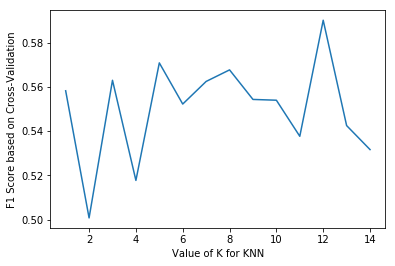

In [679]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 Score based on Cross-Validation')
plt.show()

- Grid Search

In [599]:
from sklearn.model_selection import GridSearchCV

- define the parameter values that should be searched

In [680]:
new_k_range = list(range(1, 16))
print(new_k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


- create a parameter grid: map the parameter names to the values that should be searched

In [681]:
new_param_grid = dict(n_neighbors=new_k_range)
print(new_param_grid)

new_knn = KNeighborsClassifier(n_neighbors=1)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}


- instantiate the grid

In [682]:
grid = GridSearchCV(new_knn, new_param_grid, cv=5, scoring='f1_weighted')

- fit the grid with data

In [683]:
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

- view the complete results (list of named tuples)

In [684]:
means = grid.cv_results_['mean_test_score']
means

array([ 0.55807136,  0.50034437,  0.56256466,  0.51743814,  0.5708064 ,
        0.55217673,  0.56221756,  0.56734496,  0.55388788,  0.55366992,
        0.53725693,  0.58953515,  0.54215617,  0.5313517 ,  0.52304191])

In [685]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15}]

- print out the mean scores with corresponding paramsters. 

In [686]:
for mean, params in zip(means, grid.cv_results_['params']):
    print(mean, params)

0.558071363064 {'n_neighbors': 1}
0.500344372578 {'n_neighbors': 2}
0.562564660321 {'n_neighbors': 3}
0.517438142409 {'n_neighbors': 4}
0.570806404243 {'n_neighbors': 5}
0.552176727217 {'n_neighbors': 6}
0.56221756114 {'n_neighbors': 7}
0.567344964857 {'n_neighbors': 8}
0.553887877602 {'n_neighbors': 9}
0.553669922004 {'n_neighbors': 10}
0.537256932741 {'n_neighbors': 11}
0.589535152893 {'n_neighbors': 12}
0.542156174263 {'n_neighbors': 13}
0.531351702459 {'n_neighbors': 14}
0.523041911738 {'n_neighbors': 15}


- plot the results

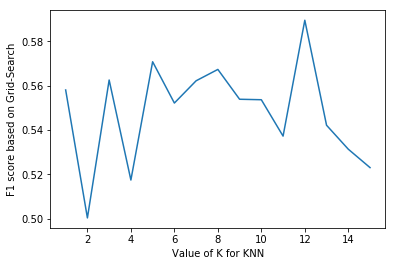

In [687]:
plt.plot(new_k_range, means)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 score based on Grid-Search')
plt.show()

In [688]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.589535152893
{'n_neighbors': 12}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')


- Training the model with the best value of K (K=12).

In [689]:
#https://stackoverflow.com/questions/5064928/difference-between-classification-and-clustering-in-data-mining
knn_final = KNeighborsClassifier(n_neighbors=12, weights='uniform')
knn_final.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [690]:
y_pred_knn = grid.predict(X_test)

probs_knn = linearModel.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_knn[:10])

knn_confusion_matrix = metrics.confusion_matrix(y_test,y_pred_knn)
knn_precision_score = metrics.precision_score(y_test,y_pred_knn, average='weighted')  
knn_recall_score = metrics.recall_score(y_test,y_pred_knn, average='weighted')      
knn_f1_score = metrics.f1_score(y_test,y_pred_knn, average='weighted')

print("KNN confusion matrix:\n", knn_confusion_matrix)
print("KNN precision score: ", knn_precision_score)   
print("KNN recall score: ", knn_recall_score)      
print("KNN f1 score: ", knn_f1_score)

test [1 1 1 0 1 1 1 1 1 0]
pred [1 0 1 0 1 1 1 1 0 1]
KNN confusion matrix:
 [[ 7 15]
 [ 5 39]]
KNN precision score:  0.675925925926
KNN recall score:  0.69696969697
KNN f1 score:  0.667867146859


#### Plot the F1 score against K value based on the results you achieved from grid search for parameter turning on k-NN.

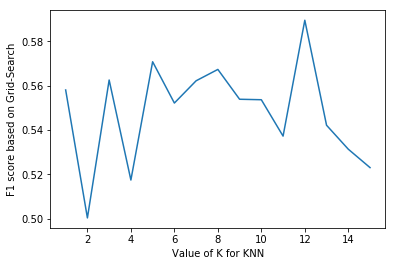

In [691]:
plt.plot(new_k_range, means)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 score based on Grid-Search')
plt.show()

We found the best value is 12 for K.

#### Using the test set, compute the confusion matrix, the precision, recall and F-measure for (1) Decision Tree, (2) k-NN, (3) SVM, and (4) Logistic Regression. For k-NN, use the best K value identified from grid search.

In [692]:
print("1.Decision Tree:")
print("dtree confusion matrix: \n",dtree_confusion_matrix)
print("dtree precision score: ",dtree_precision_score)   
print("dtree recall score: ",dtree_recall_score)      
print("dtreef1 score:", dtreef1_score)      

1.Decision Tree:
dtree confusion matrix: 
 [[ 6 16]
 [12 32]]
dtree precision score:  0.555555555556
dtree recall score:  0.575757575758
dtreef1 score: 0.563768115942


In [693]:
print("3.SVM:")
print("svm confusion matrix:\n", svm_confusion_matrix)
print("svm precision score: ", svm_precision_score)   
print("svm recall score: ", svm_recall_score)      
print("svm f1 score: ", svm_f1_score)

3.SVM:
svm confusion matrix:
 [[ 0 22]
 [ 0 44]]
svm precision score:  0.444444444444
svm recall score:  0.666666666667
svm f1 score:  0.533333333333


In [694]:
print("4.Logistic Regression:")
print("Logistic Regression confusion matrix:\n", svm_confusion_matrix)
print("Logistic Regression precision score: ", svm_precision_score)   
print("Logistic Regression recall score: ", svm_recall_score)      
print("Logistic Regression f1 score: ", svm_f1_score)

4.Logistic Regression:
Logistic Regression confusion matrix:
 [[ 0 22]
 [ 0 44]]
Logistic Regression precision score:  0.444444444444
Logistic Regression recall score:  0.666666666667
Logistic Regression f1 score:  0.533333333333
